<a href="https://colab.research.google.com/github/AnushkaD26/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
diabetes_dataset = pd.read_csv("/content/diabetes.csv")
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes_dataset.shape

(768, 9)

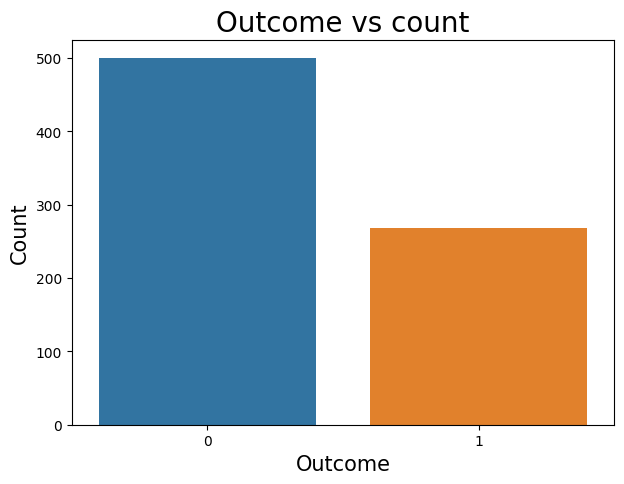

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x=diabetes_dataset['Outcome'])
plt.title('Outcome vs count',fontsize=20)
plt.xlabel('Outcome',fontsize=15)
plt.ylabel('Count',fontsize=15);

In [6]:
diabetes_dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
X = diabetes_dataset.iloc[:,:-1].values
y = diabetes_dataset.iloc[:,-1].values

In [9]:
scalar = StandardScaler()
X = scalar.fit_transform(X)
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [11]:
X_train.shape
y_train.shape

(614,)

In [12]:
classifier = svm.SVC(C=0.5, kernel='linear')
classifier.fit(X_train,y_train)

SVC(C=0.5, kernel='linear')

In [13]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
accuracy = accuracy_score(y_pred, y_test)
print(cm)
cf_matrix = cm
print("Accuracy of the model is:", accuracy)

[[87 20]
 [13 34]]
Accuracy of the model is: 0.7857142857142857


In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,X = X_train,y= y_train , cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}".format(accuracies.std()*100))

Accuracy: 76.22 %
Standard Deviation: 5.58


<Axes: >

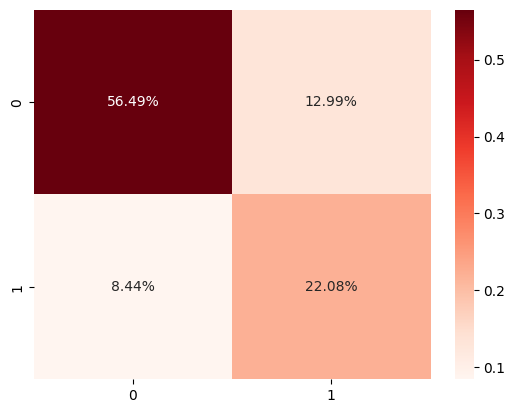

In [15]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')

<Axes: >

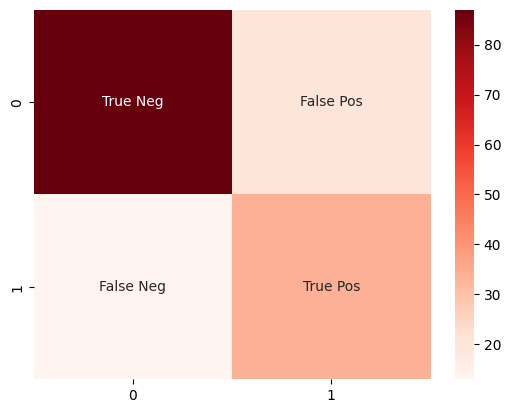

In [16]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

In [17]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.25,0.5,0.75,1], 'kernel' : ['linear']},
              {'C':[0.25,0.5,0.75,1], 'kernel' : ['rbf'], 'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10)
grid_search.fit(X_train,y_train)
print("Best Accuracy: {:.2f} %".format(grid_search.best_score_*100))
print("Best Parameters: ", grid_search.best_params_)

Best Accuracy: 76.72 %
Best Parameters:  {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'}


In [19]:
input_data = np.array([2,197,70,45,543,30.5,0.158,53])
input_data = input_data.reshape(1,-1)
standerdized_input_data = scalar.transform(input_data)
prediction = classifier.predict(standerdized_input_data)
if(prediction[0] == 0):
  print("Person is not diabetic")
else:
  print("The Person is diabetic")

The Person is diabetic
